<h1><center> DIRECTING CUSTOMERS TO SUBSCRIPTION THROUGH APP BEHAVIOUR ANALYSIS </center></h1>

## Introduction

In today's market, many companies have a mobile presesnce. Often, these companies provide free products/services in their mobile in an attempt to transition their customers to a paid membership (e.g. YouTube). Inorder to effectively carryout this task, the company has to do a effective targeting marketing strategy so as to know which customers to target with what products.

- Market: Customers who use the company's free product, in this case, customers who installed the free mobile app. It should be noted that the free trial version is valid only for 24 hours so in this case, we have data just for 24 hors
- Product: The paid membership, which is an enhanced version of the free membership


<h3> Goal Of This Project </h3>

The goal of this project is to predict which users of the free app will not subscribe to the paid membership so that other specific targeting marketing strategies can be used to convert them.

## Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline

data = pd.read_csv(r"G:\My Projects\APP BEHAVIOUR ANALYSIS\appdata10.csv")
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [2]:
#view the distributions of the numerical columns

data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
user                    50000 non-null int64
first_open              50000 non-null object
dayofweek               50000 non-null int64
hour                    50000 non-null object
age                     50000 non-null int64
screen_list             50000 non-null object
numscreens              50000 non-null int64
minigame                50000 non-null int64
used_premium_feature    50000 non-null int64
enrolled                50000 non-null int64
enrolled_date           31074 non-null object
liked                   50000 non-null int64
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


The hour column is not treated as a number but a date, reason why we do not have the descriptive statistics given for the hour columns. Inorder to see the statistics for the hour column, we have to convert the hour column to an integer format

In [4]:
#wrangling the hour column to extract the hour value

data['hour'] = data['hour'].str.slice(1,3).astype(int)
data['hour'].head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int32

## EDA

In [5]:
#drop the non numeric columns
data2 = data.copy().drop(['user','first_open','screen_list','enrolled_date','enrolled'], axis=1)
data2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


<Figure size 432x288 with 0 Axes>

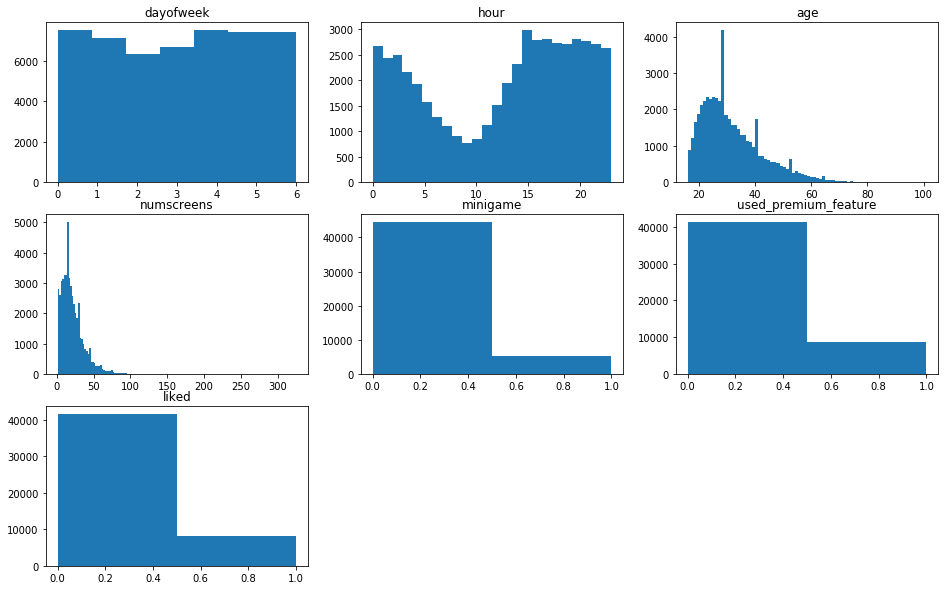

In [6]:
#plot a histogram to see the variation of the numerical columns
plt.suptitle("Histogram of Numerical Columns", fontsize=18)
plt.figure(figsize=(16,10))
#iterate over each column to get a hist plot
for i in range(1,data2.shape[1]+1):
    plt.subplot(3,3,i)
    f = plt.gca()
    f.set_title(data2.columns.values[i-1])
    b = np.size(data2.iloc[:,i-1].unique())
    plt.hist(data2.iloc[:,i-1], bins=b)

- dayofweek: This column seems to be pretty even. It appears no particular day of the week seems to be favored when it comes to customers installing the app.
- hour: The hour column shows a great drop at around the 9th hour. The time is in UTC, Coordinated Universal Time is 8 hours ahead of Pacific Time and 5 hours ahead of Eastern Time. The customers could either be in the eastern or pacific time zones, the 10th hour is late at night when most people are sleeping. That explains why the there is a great dip in the histogram around that time.
- age: this is as expected. There is a steady rise is the customers who download the app from about 20 years old. Most people who download the app are around the age of 30. The distribution is pretty even with a few outliers.
- numscreens: even distribution here as well with one or two outliers.
- minigame: most of the people did not download the app
- used_premium_feature: most people haven't used the premium feature
- liked: most people have not liked 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

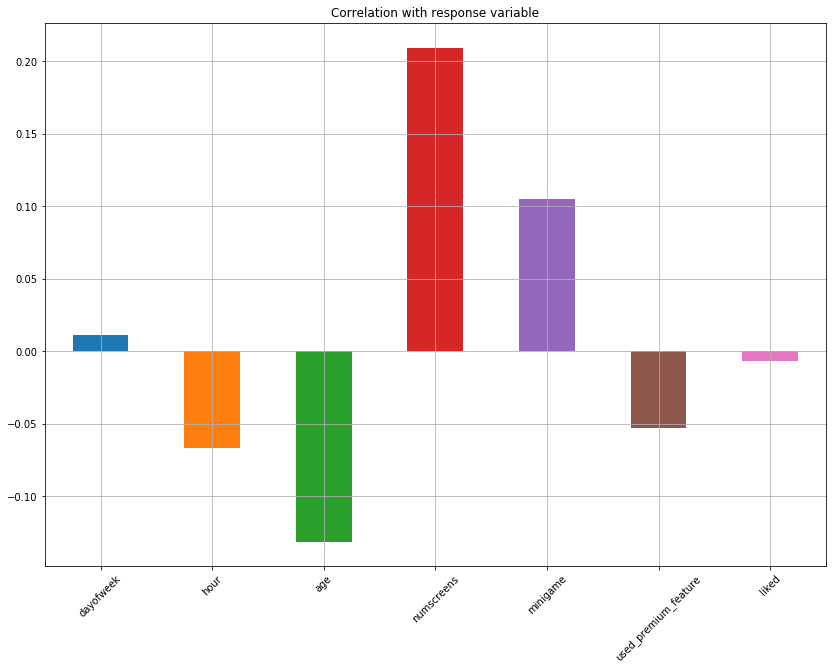

In [7]:
#correlation with the response variable
data2.corrwith(data['enrolled']).plot.bar(figsize=(14,10), title='Correlation with response variable', grid=True)
plt.xticks(rotation=45)

Interestingly, used_premium_feature is negatively correlated with the response variable.

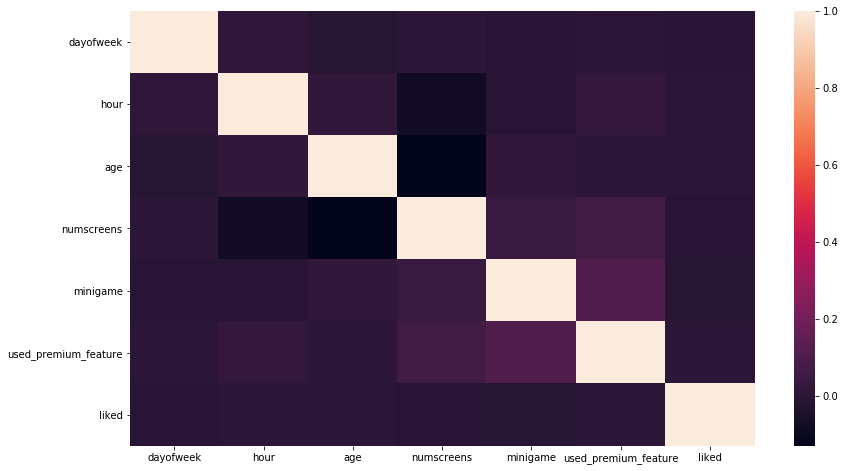

In [8]:
# Correlation matrix
plt.figure(figsize=(14,8))
sns.heatmap(data2.corr())

Looking at the correlation matrix, all the variables seem to be pretty independent

## Feature Engineering
The first feature we will consider fine tunning is the response variable. We need to set a limit on when we expect a user to be converted to a paid member. This is because we want to have a way to validate the model on future datasets. To understand the optimal time limit, we need to plot the distribution of first_opened and the enrolled_date


In [9]:
#check on the datatypes in the dataset
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

It seems the first_open variable and the enrolled date variable are objects, so it makes it difficult to do the comparison. There is need to convert them to dates

In [10]:
#convert the string objects to datetime
data['first_open'] = [parser.parse(row) if isinstance(row, str) else row for row in data['first_open']]
data['enrolled_date'] = [parser.parse(row) if isinstance(row, str) else row for row in data['enrolled_date']]

data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [11]:
#create a difference column containing just the hour differences

data["difference"] = (data["enrolled_date"] - data["first_open"]).astype("timedelta64[h]")

In [12]:
data["difference"].head()

0    NaN
1    NaN
2    NaN
3    0.0
4    0.0
Name: difference, dtype: float64

Text(0.5,1,'Distribution of Time Since Enrolled')

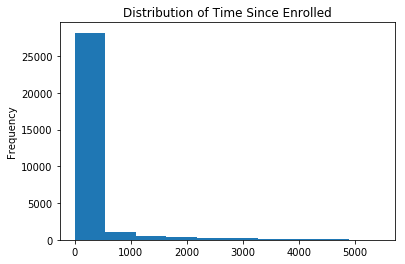

In [13]:
#Lets get the distrbution of the difference column
data['difference'].dropna().plot.hist()
plt.title("Distribution of Time Since Enrolled")

The distribution shows the most people enrolled within the first 500 hours. But we are not sure of the exact time, to get a feel of the actual time limit, we need to see the actual distribution below 500 hours.

Text(0.5,1,'Distribution of Time Since Enrolled')

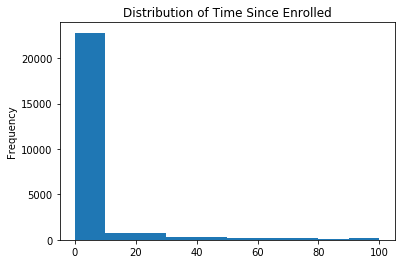

In [14]:
# reduce the range from 0 - 100
data['difference'].dropna().plot.hist(range=[0,100])
plt.title("Distribution of Time Since Enrolled")


We see that almost all the enrollements happened within the first 10 hours. Nevertheless we can just choose 2days (48hours) for the cut off time. We would consider the few people who enrolled after the 48hour cut off time as though they did not enroll (enrolled = 0).

In [15]:
#assign 0 to those who enrolled after 48 hours
data.loc[data['difference'] > 48, 'enrolled'] = 0

#drop the columns we no longer have use for
data = data.drop(['difference', 'first_open','enrolled_date'], axis=1)
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [16]:
# for the screen_list: after analysis, another dataset is available which contains a list of the top screens

top_screen = pd.read_csv(r'G:\My Projects\APP BEHAVIOUR ANALYSIS\top_screens.csv')
top_screen.head()

,Unnamed: 0,top_screens
0,0,Loan2
1,1,location
2,2,Institutions
3,3,Credit3Container
4,4,VerifyPhone


In [17]:
top_screens = top_screen['top_screens'].values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [18]:
len(top_screens)

58

In [19]:
#create as many commas as there are screens on the screen_list feature

data['screen_list'] = data['screen_list'].astype(str) + ','

#create a new column containing 1 or 0 depending on wether the a screen
for sc in top_screens:
    data[sc] = data['screen_list'].str.contains(sc).astype(int)
    data['screen_list'] = data['screen_list'].str.replace(sc+",","")

data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,...,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker
0,235136,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,254414,1,19,23,,3,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,51549,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.shape

(50000, 68)

In [21]:
data = data.drop('screen_list', axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 67 columns):
user                       50000 non-null int64
dayofweek                  50000 non-null int64
hour                       50000 non-null int32
age                        50000 non-null int64
numscreens                 50000 non-null int64
minigame                   50000 non-null int64
used_premium_feature       50000 non-null int64
enrolled                   50000 non-null int64
liked                      50000 non-null int64
Loan2                      50000 non-null int32
location                   50000 non-null int32
Institutions               50000 non-null int32
Credit3Container           50000 non-null int32
VerifyPhone                50000 non-null int32
BankVerification           50000 non-null int32
VerifyDateOfBirth          50000 non-null int32
ProfilePage                50000 non-null int32
VerifyCountry              50000 non-null int32
Cycle                      

## Normalization

In [27]:
X = data.drop('enrolled', axis=1)
y = data['enrolled']

from sklearn.model_selection import train_test_split

In [28]:
train_test_split = X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The user will not be used for the model building but we will need it in the final results to identify the predictions.

In [29]:
# Removing Identifiers
train_id = X_train['user']
X_train = X_train.drop(columns = ['user'])
test_identity = X_test['user']
X_test = X_test.drop(columns = ['user'])

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

## Trainning the Model

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, penalty='l1') #we use the l1 regularization to penalize the features with strong correlation to the target
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Model Evaluation

In [33]:
#drawing predictions from the model
y_pred = lr.predict(X_test)

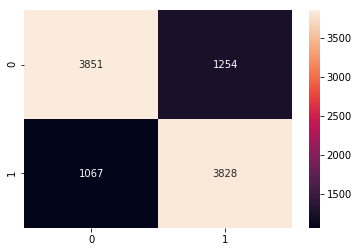

In [36]:
#evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')

In [38]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.75      0.77      5105
          1       0.75      0.78      0.77      4895

avg / total       0.77      0.77      0.77     10000



## Model Validation

In [46]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [52]:
scores = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 10)
print("LogisticRegression Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

LogisticRegression Accuracy: 0.758 (+/- 0.014)


Using cross validation above, the model does not seem to overfit, it is in good shape

## Model Tunning Using GridSearch

In [56]:
from sklearn.model_selection import GridSearchCV
import time

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = lr, param_grid = parameters, scoring = "accuracy", cv = 10,n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

Took 53.51 seconds


In [58]:
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

(0.7579, {'C': 0.1, 'penalty': 'l1'})

## Conclusion

Having an idea before hand if a user will enroll into the paid membership can actually help the company's marketing teams and other teams to make better decisions inorder to attract more customers.